# Stock Price Predictions

We can also make testable predictions by restricting our model to a subset of the data, and then using the forecasted values to see how correct our model is. We will restrict data up until the end of 2016, and then try to make predictions for 2017.

In [38]:
import quandl 
import pandas as pd
import numpy as np
import fbprophet

import matplotlib.pyplot as plt
%matplotlib inline

## Retrieve Data from Quandl

In [83]:
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

# Using Tesla data
tesla_stocks = quandl.get('WIKI/TSLA')

In [84]:
# Set the index (with dates) to a column 
tesla_stocks.reset_index(level=0, inplace=True)

# Rename the columns for prophet and create a year column
tesla_stocks.rename(columns={'Date': 'ds', 'Adj. Close': 'y'}, inplace=True)
tesla_stocks['Year'] = [date.year for date in tesla_stocks['ds']]

In [85]:
tesla_stocks.head()

,ds,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,y,Adj. Volume,Year
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010


In [86]:
# Create a new dataframe with the relevant information
tesla_data = tesla_stocks[['ds', 'Year', 'y']]

# Training and testing data
tesla_train = tesla_data[tesla_data['Year'] < 2017]
tesla_test = tesla_data[tesla_data['Year'] > 2016]

In [87]:
# Create a new model 
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.2)

# Train the model
tesla_prophet.fit(tesla_train)

# Number of days to make predictions 
days = (max(tesla_test['ds']) - min(tesla_test['ds'])).days

# Future dataframe
tesla_forecast = tesla_prophet.make_future_dataframe(periods = days, freq = 'D')

# Make forecasts
tesla_forecast = tesla_prophet.predict(tesla_forecast)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
tesla_results = tesla_forecast.merge(tesla_test, how = 'inner', on = 'ds')
tesla_results = tesla_results[['ds', 'y', 'yhat']]

# Predicted difference between stock prices
tesla_results['pred_diff'] = (tesla_results['yhat']).diff()

# Actual difference between stock prices
tesla_results['real_diff'] = (tesla_results['y']).diff()

In [89]:
# Correct direction column
tesla_results['correct'] = (np.sign(tesla_results['pred_diff']) == np.sign(tesla_results['real_diff'])) * 1

In [90]:
tesla_results.head()

,ds,y,yhat,pred_diff,real_diff,correct
0,2017-01-03,216.99,187.136068,NaN,NaN,0
1,2017-01-04,226.99,186.382225,-0.753843,10.00,0
2,2017-01-05,226.75,185.686356,-0.695869,-0.24,1
3,2017-01-06,229.01,184.887330,-0.799026,2.26,0
4,2017-01-09,231.28,183.013857,-1.873472,2.27,0


In [91]:
np.mean(tesla_results['correct'])

0.4823529411764706

### Value of Predictions

In [92]:
tesla_results = tesla_results.merge(tesla_stocks[['ds', 'Adj. Open']], how = 'left', on = 'ds')

In [93]:
tesla_results[tesla_results['correct'] == 1].head()

,ds,y,yhat,pred_diff,real_diff,correct,Adj. Open
2,2017-01-05,226.75,185.686356,-0.695869,-0.24,1,226.42
5,2017-01-10,229.87,182.848551,-0.165306,-1.41,1,232.00
6,2017-01-11,229.73,182.252256,-0.596295,-0.14,1,229.07
7,2017-01-12,229.59,181.756956,-0.495299,-0.14,1,229.06
9,2017-01-17,235.58,180.335340,-0.860184,-2.17,1,236.70


In [94]:
tesla_results['daily_diff'] = abs(tesla_results['y'] - tesla_results['Adj. Open'])

In [97]:
tesla_results['profit'] = [tesla_results.ix[i, 'daily_diff'] if tesla_results.ix[i, 'correct'] == 1 else tesla_results.ix[i, 'daily_diff'] * -1 for i in range(len(tesla_results))]

In [101]:
1000 * np.sum(tesla_results['profit'])

-38178.299999999355

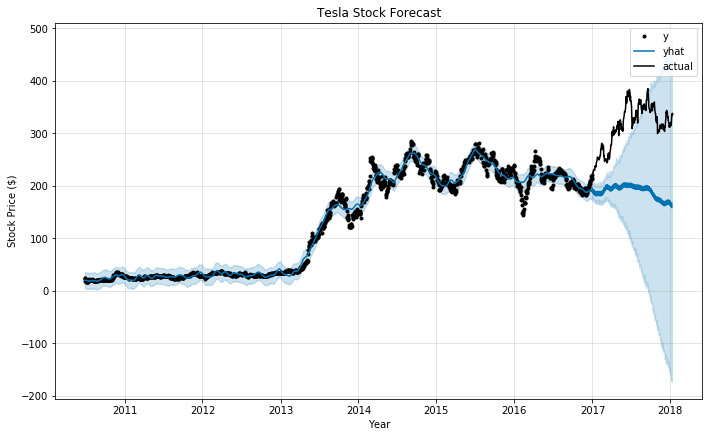

In [36]:
tesla_prophet.plot(tesla_forecast)
plt.title('Tesla Stock Forecast'); plt.ylabel('Stock Price ($)'); plt.xlabel('Year');
plt.plot(tesla_test['ds'], tesla_test['y'], 'k', label = 'actual')
plt.legend();

In [ ]:
def plot_predictions(stock, predictions):
     xvalues = list(range(len(results['Date'])))

    xlabels = list(range(13))
    xlabels.append(1)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8));
    ax.plot(xvalues, results['Adj. Close'], 'b-', label = 'Actual');
    ax.plot(xvalues, results['yhat'], 'r*', label = 'Predicted');
    ax.fill_between(xvalues, results['yhat_upper'], results['yhat_lower'], alpha=0.6, edgecolor = 'k');
    ax.set_xticks(ticks = list(range(0, max(xvalues), int(max(xvalues) / 12))));
    ax.set_xticklabels(labels = xlabels);
    plt.legend();
    plt.xlabel('2017'); plt.ylabel('Billions $'); plt.title('Stock Price Prediction for %s' % ticker)
    plt.show()
                  
    
    
    # Plot actual and predicted difference
    plt.figure(figsize = (10, 8))
    plt.plot(results['Date'], results['actual_diff'], 'bo-', label = 'Actual')
    plt.plot(results['Date'], results['pred_diff'], 'r*-', label = 'Predicted')
    plt.legend(); plt.xlabel('Date'); plt.ylabel('Change (US $)'); plt.title('Actual vs. Predicted Daily Change');
    plt.show();

In [138]:
def stock_predictor(ticker='TSLA'):
    try:
        stock = quandl.get('WIKI/%s' % ticker.upper())
    except Exception as e:
        print('Invalid Stock Ticker')
        print(e)
        return
    
    # Change the index to a Date column
    stock_clean = stock.reset_index()[['Date', 'Adj. Close', 'Adj. Open']]
    
    # Create a year column
    stock_clean['Year'] = [date.year for date in stock_clean['Date']]
    
    # Only using years past 2010
    stock_clean = stock_clean[stock_clean['Year'] > 2010]
    
    # Rename for prophet training
    stock_clean = stock_clean.rename(columns={'Date': 'ds', 'Adj. Close': 'y'})
    
    # Training and Testing Sets
    stock_train = stock_clean[stock_clean['Year'] < 2017]
    stock_test = stock_clean[stock_clean['Year'] > 2016]
    
    # Create the prophet model and fit on training set
    stock_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
    stock_prophet.fit(stock_train)
    
    # Number of days to predict
    days = (max(stock_test['ds']) - min(stock_test['ds'])).days
    
    # Make forecasts for entire length of test set + one week
    stock_forecast = stock_prophet.make_future_dataframe(periods=days + 7, freq = 'D')
    stock_forecast = stock_prophet.predict(stock_forecast)
    
    # Plot the entire series
    stock_prophet.plot(stock_forecast); plt.xlabel('Year'); plt.ylabel('Price (US $)');
    plt.title('%s Stock Price and Predictions' % ticker)
    
    # Dataframe for predictions and test values
    results = stock_forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
    
    # Merge to get acutal values (y)
    results = pd.merge(results, stock_test[['ds', 'y']], on = 'ds', how='right')
    
    # Merge to get daily opening values (Adj. Open)
    results = results.merge(stock_clean[['ds', 'Adj. Open']], on = 'ds', how ='inner')
    
    # Columns of daily changes
    results['pred_diff'] = results['yhat'].diff()
    results['real_diff'] = results['y'].diff()
    
    # Whether the prediction was right or wrong
    # Multiply by 1 to convert to an integer
    results['correct'] = (np.sign(results['pred_diff']) == np.sign(results['real_diff'])) * 1
    
    # Calculate daily change in price
    results['daily_change'] = abs(results['y'] - results['Adj. Open'])
    
    # Only buy if predicted to increase
    results_pred_increase = results[results['pred_diff'] > 0]
        
    # Calculate profits or losses
    profits = []
    for i, correct in enumerate(results_pred_increase['correct']):
        if correct == 1:
            profits.append(results.ix[i, 'daily_change'])
        else:
            profits.append(results.ix[i, 'daily_change'] * - 1)
    
    results_pred_increase['profits'] = profits
    
    # Calculate total profit if buying 1000 shares every day
    total_profit = int(1000 * np.sum(profits))
    
    # Calculate total profit if buying and holding 1000 shares for entire time
    first_price = int(results[results['ds'] == min(results['ds'])]['y'])
    last_price = int(results[results['ds'] == max(results['ds'])]['y'])

    # Smart profit
    smart_profit = (last_price - first_price) * 1000
    
    # Total accuracy is percentage of correct predictions
    accuracy = np.mean(results['correct']) *  100
    
    performance = {'pred_profit': total_profit, 'smart_profit': smart_profit, 'accuracy': accuracy}
    
    print('Your profit from playing the stock market in {}: {:.0f} $.'.format(ticker, total_profit))
    print('The buy and hold profit (smart strategy)  in {}: {:.0f} $.'.format(ticker, smart_profit))
    print('Thanks for playing the stock market!')
    
    return performance

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Your profit from playing the stock market in TSLA: -4876 $.
The buy and hold profit (smart strategy)  in TSLA: 120000 $.
Thanks for playing the stock market!


{'accuracy': 47.49034749034749, 'pred_profit': -4876, 'smart_profit': 120000}

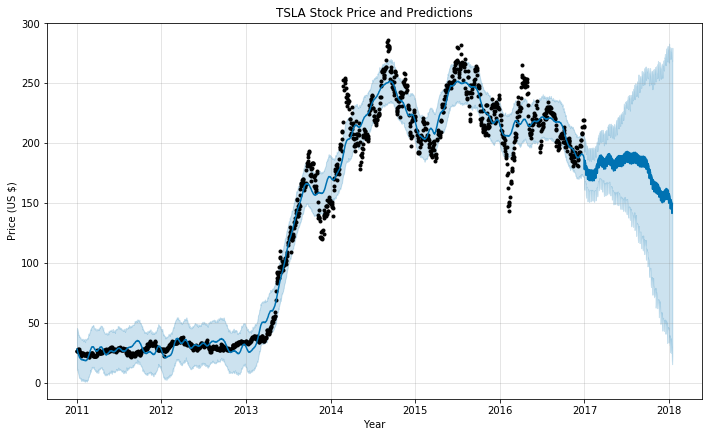

In [ ]:
stock_predictor('TSLA')

In [ ]:
stock_predictor('CAT')

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
